/home/raphe/.local/lib/python3.5/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imsave` is deprecated!
`imsave` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imwrite`` instead.
  # This is added back by InteractiveShellApp.init_path()


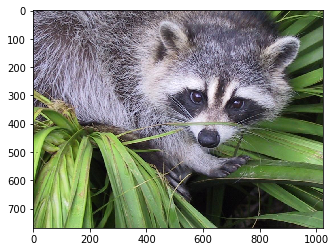

In [1]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    from unityagents import UnityEnvironment

import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import misc
f = misc.face()
misc.imsave('face.png', f) # uses the Image module (PIL)

import matplotlib.pyplot as plt
plt.imshow(f)
plt.show()

(3, 768, 1024)


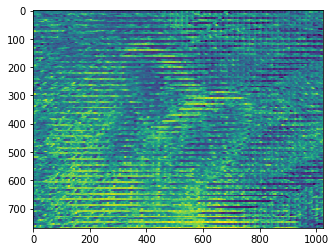

In [2]:
f=np.array(f)
h, w, c = f.shape
fbis=f.reshape((c, h, w))
print(fbis.shape)
plt.imshow(fbis[0])

In [3]:
env = UnityEnvironment(file_name="/home/raphe/Cours/VisualBanana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 1
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 0
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

Number of agents: 1
Number of actions: 4
States look like:


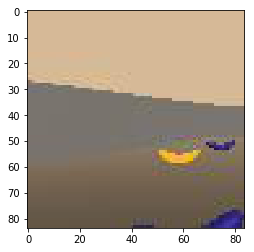

States have shape: (1, 84, 84, 3)


In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.visual_observations[0]
print('States look like:')
plt.imshow(np.squeeze(state))
plt.show()
state_size = state.shape
print('States have shape:', state.shape)

In [6]:
"""
from dqn_agent import dqn_Agent

agent = dqn_Agent(state_size=37, action_size=4, seed=0)

# watch an untrained agent
env_info =  env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
print(state)
score = 0
for j in range(200):
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]   # get the next state
#print(next_state)
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
print("Score: {}".format(score))  

"""


'\nfrom dqn_agent import dqn_Agent\n\nagent = dqn_Agent(state_size=37, action_size=4, seed=0)\n\n# watch an untrained agent\nenv_info =  env.reset(train_mode=True)[brain_name]\nstate = env_info.vector_observations[0]\nprint(state)\nscore = 0\nfor j in range(200):\n    action = agent.act(state)\n    env_info = env.step(action)[brain_name]\n    next_state = env_info.vector_observations[0]   # get the next state\n#print(next_state)\n    reward = env_info.rewards[0]                   # get the reward\n    done = env_info.local_done[0]                  # see if episode has finished\n    score += reward                                # update the score\n    state = next_state                             # roll over the state to next time step\n    if done:                                       # exit loop if episode finished\n        break\nprint("Score: {}".format(score))  \n\n'

In [ ]:
from dqn_agent import dqn_Agent

agent = dqn_Agent(state_size=(1, 3, 84, 84), action_size=4, seed=0)

def dqn(n_episodes=700, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores_mean_w=[]
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    timestep = [] 
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name] 
        state = env_info.visual_observations[0]
        state = np.array(state).transpose((0, 3, 1, 2))
       
        score = 0
       # print("state",state.shape)
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.visual_observations[0]   # get the next state
            next_state = np.array(next_state).transpose((0, 3, 1, 2))
            #print("aft next state",next_state.shape)

            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            agent.step(state, action, reward, next_state, done)
 
            score += reward                                # update the score
            state = next_state   # roll over the state to next time step
           # print("next state end",next_state.shape)
            time = t
            if done:                                     # exit loop if episode finished
                break
 
        timestep.append(time)                # save most recent time step
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        
        if i_episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
        if i_episode % 10 == 0:            
            scores_mean_w.append(np.mean(scores_window))
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'dqn_checkpoint.pth')
            break
    return scores,scores_mean_w,timestep

dqn_scores,dqn_scores_mean_w ,timestep= dqn()

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores)), dqn_scores)
plt.ylabel('dqn_Score')
plt.xlabel('Episode #')
plt.show()

ax = fig.add_subplot(111)
plt.plot(np.arange(len(dqn_scores_mean_w))*10, dqn_scores_mean_w)
plt.ylabel('dqn_Score mean over 100 every 10')
plt.xlabel('Episode #')
plt.show()

ax = fig.add_subplot(111)
plt.plot(np.arange(len(timestep)), timestep)
plt.ylabel('timestep')
plt.xlabel('Episode #')
plt.show()

Episode 100	Average Score: -0.10


In [ ]:
env.close()